In [23]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
import numpy as np
import pandas as pd
import seaborn as sns
#loading iris dataset
data = sns.load_dataset("iris")
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [24]:
#iris dataset infomration
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [25]:
#classification SVM 3 classes avec deux attributs
from sklearn.model_selection import train_test_split
svm1 = data.replace({"species":  {"setosa":1,"versicolor":2, "virginica":3}})
X = svm1.drop(['species','sepal_width','petal_width'],axis=1)
Y = svm1['species']
X.head()
Y.head() 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

In [26]:
#model training
from sklearn.svm import SVC
svm = SVC()
clf=svm.fit(X_train,Y_train)
#predicting 
pred = svm.predict(X_test)
svm.score(X_test,Y_test)

0.9666666666666667

In [27]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


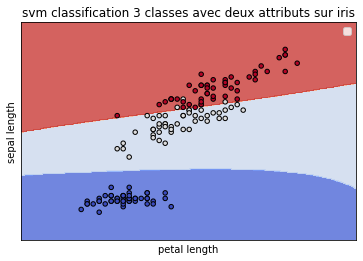

In [28]:
#plotting 
figure, axis = plt.subplots()
# title for the plots
title = ('svm classification 3 classes avec deux attributs sur iris')
# Set-up grid for plotting.
X0, X1 = X["sepal_length"], X["petal_length"]
xx, yy = make_meshgrid(X0, X1)
plot_contours(axis, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
inv_name_dict = {"setosa":1,"versicolor":2, "virginica":3}
colors = [inv_name_dict[item] for item in data['species']]
axis.scatter(X0, X1,c=colors,cmap=plt.cm.coolwarm, s=20, edgecolors='k')
axis.set_ylabel('sepal length')
axis.set_xlabel('petal length')
axis.set_xticks(())
axis.set_yticks(())
axis.set_title(title)
axis.legend()
plt.show()

In [30]:
from sklearn.metrics import classification_report
print("Precision, Recall, Confusion matrix, in training\n")
# Precision Recall scores
print(metrics.classification_report(Y_test, pred))
# Confusion matrix
print(metrics.confusion_matrix(Y_test,pred))

Precision, Recall, Confusion matrix, in training



NameError: ignored

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


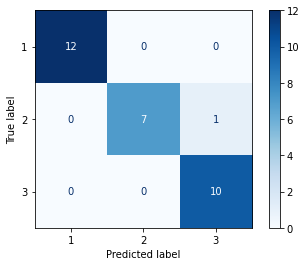

In [31]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,X_test,Y_test,cmap=plt.cm.Blues)

In [32]:
#Svm classification avec 2 classes et deux attributs 
from sklearn.model_selection import train_test_split
svm2 = data.replace({"species":  {"setosa":1,"versicolor":2, "virginica":3}})
index = svm2[ (svm2['species'] == 1)].index
svm2.drop(index , inplace=True)
svm2.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,2
51,6.4,3.2,4.5,1.5,2
52,6.9,3.1,4.9,1.5,2
53,5.5,2.3,4.0,1.3,2
54,6.5,2.8,4.6,1.5,2


In [33]:
X = svm2.drop(['species','sepal_width','petal_width'], axis = 1)
Y = svm2['species']
X.head()

,sepal_length,petal_length
50,7.0,4.7
51,6.4,4.5
52,6.9,4.9
53,5.5,4.0
54,6.5,4.6


In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)
from sklearn.svm import SVC
svm = SVC()
clf=svm.fit(X_train,Y_train) 
pred = svm.predict(X_test)
print("précision")
svm.score(X_test,Y_test)

précision


0.9

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


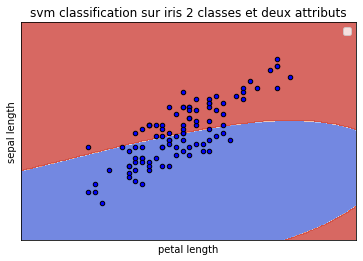

In [35]:
#plotting 
figure, axis = plt.subplots()
title = ('svm classification sur iris 2 classes et deux attributs')
X0, X1 = X["sepal_length"], X["petal_length"]
xx, yy = make_meshgrid(X0, X1)
plot_contours(axis, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
axis.scatter(X0, X1, c="blue", cmap=plt.cm.coolwarm, s=20, edgecolors='k')
axis.set_ylabel('sepal length')
axis.set_xlabel('petal length')
axis.set_xticks(())
axis.set_yticks(())
axis.set_title(title)
axis.legend()
plt.show()

In [61]:
from sklearn.metrics import classification_report
print("Precision, Recall, Confusion matrix, in training\n")
# Precision Recall scores
print(metrics.classification_report(Y_test, pred))
# Confusion matrix
print(metrics.confusion_matrix(Y_test,pred))

Precision, Recall, Confusion matrix, in training



NameError: ignored

In [37]:
#classification SVM de deux classes avec quatre attributs
from sklearn.model_selection import train_test_split
svm3 = data.replace({"species":  {"setosa":1,"versicolor":2, "virginica":3}})
act = data[ (data['species'] == 1)].index
data.drop(act , inplace=True)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [38]:
X = data.drop(['species'], axis = 1)
Y = data['species']
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [39]:
#Entrainer le modèle et effectuer la classification SVM 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)
from sklearn.svm import SVC
svm = SVC()
clf=svm.fit(X_train,Y_train) 
svm.score(X_test,Y_test)


0.9666666666666667

In [40]:
#loading iris dataset
data_uci = pd.read_csv("uci_malware_detection.csv")
data_uci.head(5)

,Label,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,...,F_522,F_523,F_524,F_525,F_526,F_527,F_528,F_529,F_530,F_531
0,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [41]:
# dataset description
data_uci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Columns: 532 entries, Label to F_531
dtypes: int64(531), object(1)
memory usage: 1.5+ MB


In [45]:
#classification SVM du nouveau dataset
data_uci1 = pd.read_csv("uci_malware_detection.csv")
X = data_uci1.drop(['Label'], axis = 1)
Y = data_uci1['Label']
X_train, X_test, Y_train, Y_testt = train_test_split(X, Y, test_size=0.20)
svm = SVC(kernel="linear")
clf = svm.fit(X_train,Y_train)
predd = svm.predict(X_test)
svm.score(X_test,Y_testt)

0.9466666666666667

In [46]:
#Test de généralisation
from sklearn.metrics import classification_report
print(classification_report(Y_testt, predd))

               precision    recall  f1-score   support

    malicious       0.94      1.00      0.97        58
non-malicious       1.00      0.76      0.87        17

     accuracy                           0.95        75
    macro avg       0.97      0.88      0.92        75
 weighted avg       0.95      0.95      0.94        75



In [47]:
#loading the adults dataset
ecoli_df = pd.read_csv("ecoli.csv",header=None,sep="\s+")
col_names = ["squence_name","mcg","gvh","lip","chg","aac","alm1","alm2","site"]
ecoli_df.columns = col_names
ecoli_df.head()

,squence_name,mcg,gvh,lip,chg,aac,alm1,alm2,site
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp


In [48]:
ecoli_df.isnull().sum()

squence_name    0
mcg             0
gvh             0
lip             0
chg             0
aac             0
alm1            0
alm2            0
site            0
dtype: int64

In [49]:
#cleaning the data 
ecoli_df.loc[:,ecoli_df.dtypes == "object"].columns.tolist()

['squence_name', 'site']

In [50]:
#classification SVM du nouveau dataset
X = ecoli_df.drop(['squence_name','site'], axis = 1)
Y = ecoli_df['site']
#split data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
svm = SVC(kernel="linear")
clf = svm.fit(X_train,Y_train)
pred = svm.predict(X_test)
print("Precision du model:")
svm.score(X_test,Y_test)

Precision du model:


0.7738095238095238

In [51]:
#Test de généralisation
from sklearn.metrics import classification_report
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

          cp       0.94      1.00      0.97        34
          im       0.63      0.89      0.74        19
         imL       0.00      0.00      0.00         1
         imU       0.00      0.00      0.00         9
          om       1.00      0.33      0.50         6
         omL       0.00      0.00      0.00         2
          pp       0.63      0.92      0.75        13

    accuracy                           0.77        84
   macro avg       0.46      0.45      0.42        84
weighted avg       0.69      0.77      0.71        84



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
